# Import libraries

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsClassifier    
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

# Load data and preview our data

In [253]:
raw_df = pd.read_csv("C:\\Users\\Win\\Desktop\\master\\term 3\\Advance Data Mining\\spaceship-titanic.csv")
df = raw_df.copy(deep = True)
df.head() #Let's see the first five rows

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# EDA & Feature engineering

I want to see what is the shape of my data set

In [254]:
df.shape

(8693, 14)

I want to see my features in the list

In [255]:
df.columns.to_list()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [257]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<AxesSubplot:xlabel='Transported', ylabel='count'>

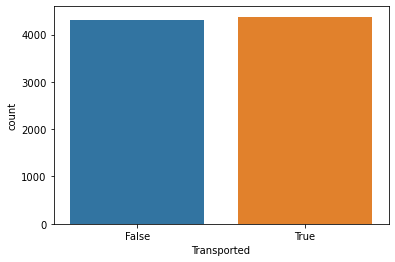

In [258]:
#check balance or imbalance
sns.countplot(data = df, x = 'Transported')

Data is balance.

# Drop irrelevant columns

In [259]:
cols_to_drop = ['PassengerId', 'Name']
df = df.drop(cols_to_drop, axis = 1)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


# Filling null values

In [260]:
df.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

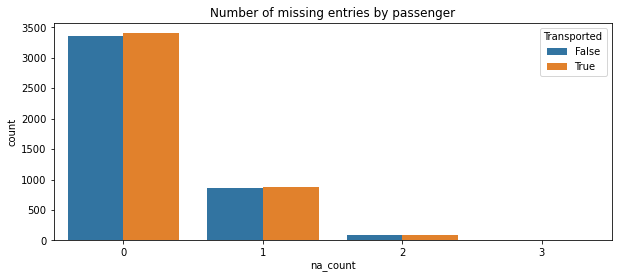

In [261]:
# Countplot of number of missing values by passenger

df['na_count']=df.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
df.drop('na_count', axis=1, inplace=True)

 there aren't very many rows with more than one null value.

### Filling null values of numerical columns

In [262]:
imputed_df = df.copy(deep=True)    
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [263]:
def impute(data, columns, strategy = 'median'):
    imputer = SimpleImputer(strategy=strategy)
    data[columns] = imputer.fit_transform(data[columns])
    return data

Count the number of na values per column

In [264]:
imputed_df = impute(imputed_df, numerical_cols)
imputed_df.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

### Filling null values of categorical columns

In [265]:
categorical_cols = ['HomePlanet', 'CryoSleep','Cabin' ,'Destination', 'VIP']

imputed_df = impute(imputed_df, categorical_cols, strategy='most_frequent')

imputed_df.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

We don't have any missing value

Let's see our dataset again

In [266]:
imputed_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


Changing Cabin address to first letter

In [267]:
for i in imputed_df['Cabin']:
    imputed_df['Cabin'] = imputed_df['Cabin'].replace(i, i[0])

In Age column we have 0 as value! So we should fix it.

In [268]:
impute_0_df = imputed_df.copy(deep = True)
imputer_0 = SimpleImputer(missing_values=0)
impute_0_df['Age'] = imputer_0.fit_transform(impute_0_df['Age'].values.reshape(-1, 1))
impute_0_df['Age'].describe()

count    8693.000000
mean       29.392132
std        13.723947
min         1.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

# Outlier Detection

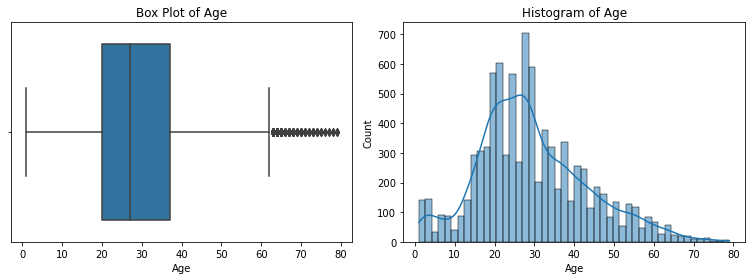

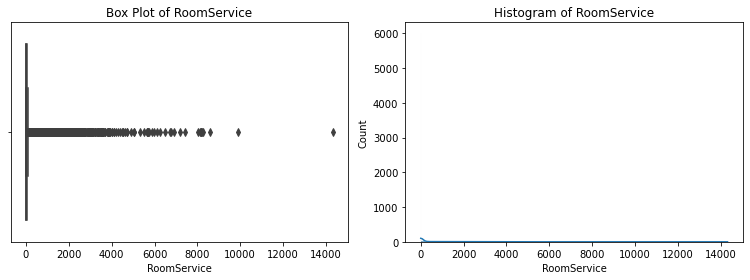

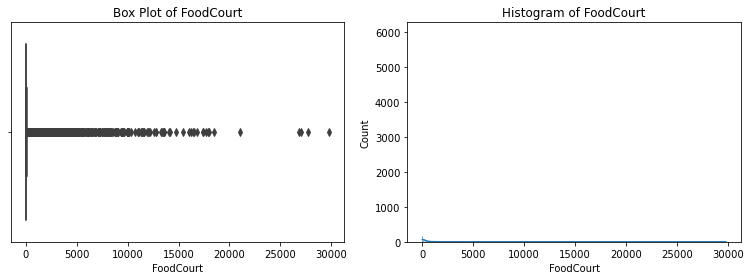

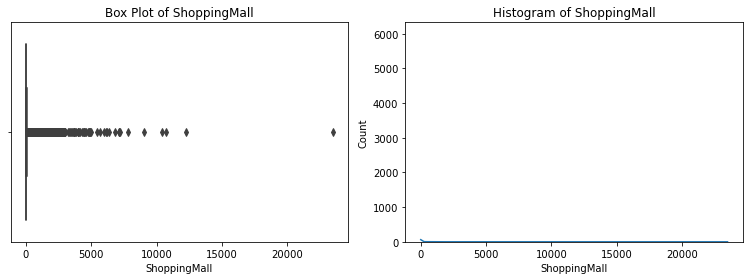

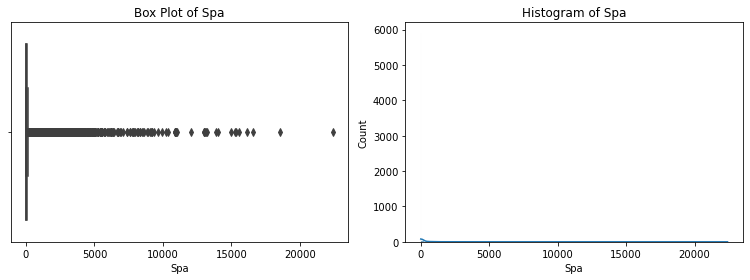

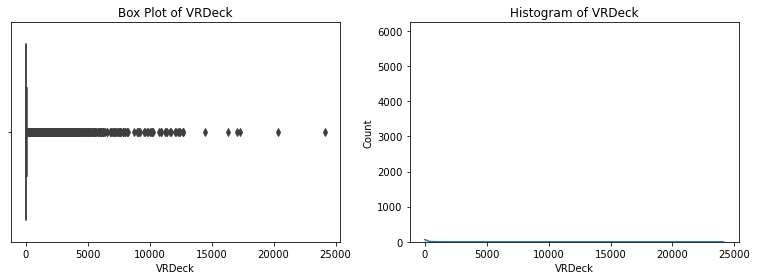

In [272]:
def OutlierDetection(impute_0_df, column):
    plt.figure(figsize=(16, 4))
    
    # Box Plot
    plt.subplot(1, 3, 1)
    plt.title(f"Box Plot of {column}")
    sns.boxplot(data=impute_0_df,x=column)
    
    # Histogram
    plt.subplot(1, 3, 2)
    plt.title(f"Histogram of {column}")
    sns.histplot(data=impute_0_df,x=column, kde=True)
    
    
    plt.tight_layout()
    plt.show()


num_col = impute_0_df.select_dtypes(np.number).columns
for column in num_col :
    OutlierDetection(impute_0_df, column)

Other then age there is no column in which we consider it as outliers because they in other column there are few passenger then expands mony might be rich poeple so we should not ignore the rich poeples in data

And in the age there are few person that are outlier in right side and we should not drop them because our should study the relationships of old passenger with transportation

# Encoding Categorical Columns

In [217]:
#Let's see unique value of each feature
for cat in categorical_cols:
    print(cat,':',impute_0_df[cat].unique())

HomePlanet : ['Europa' 'Earth' 'Mars']
CryoSleep : [False  True]
Cabin : ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
VIP : [False  True]


### Encode boolean columns

In [218]:
cat_df = impute_0_df.copy(deep = True)
bool_col = ['CryoSleep','VIP','Transported']
cat_df[bool_col] = cat_df[bool_col].astype(int)
cat_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,F,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,A,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,A,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,F,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


# Label Eencoding

In [175]:
label_df = cat_df.copy(deep = True)
encode_cols = ['HomePlanet','Cabin','Destination']

label_encoder = OrdinalEncoder()
label_df[encode_cols] = label_encoder.fit_transform(label_df[encode_cols]) 
label_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0,1.0,2.0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0,5.0,2.0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1.0,0,0.0,2.0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1.0,0,0.0,2.0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0.0,0,5.0,2.0,16.0,0,303.0,70.0,151.0,565.0,2.0,1


# Variable Discretization
### Equal Length Intervals

We divided age into different age categories and then encoded it.

In [176]:
age_bins = [0, 12, 19, 35, 60, float('inf')]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Middle-Aged', 'Senior']
    
label_df['Age_Groups'] = pd.cut(label_df['Age'], bins=age_bins, labels=age_labels, right=False)

In [177]:
label_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_Groups
0,1.0,0,1.0,2.0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,Middle-Aged
1,0.0,0,5.0,2.0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,Young Adult
2,1.0,0,0.0,2.0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,Middle-Aged
3,1.0,0,0.0,2.0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,Young Adult
4,0.0,0,5.0,2.0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,Teenager


In [178]:
label_df.drop('Age', axis =1,inplace = True)

In [179]:
label_df['Age_Groups'] = label_encoder.fit_transform(label_df[['Age_Groups']]) 
label_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_Groups
0,1.0,0,1.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0
1,0.0,0,5.0,2.0,0,109.0,9.0,25.0,549.0,44.0,1,4.0
2,1.0,0,0.0,2.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1.0
3,1.0,0,0.0,2.0,0,0.0,1283.0,371.0,3329.0,193.0,0,4.0
4,0.0,0,5.0,2.0,0,303.0,70.0,151.0,565.0,2.0,1,3.0


# Buliding model

In the below function ,after dividing dataset to train and test we use MinMaxScaler to scale dataset.

### KNN & MinMaxScaler

In [180]:
# Function for building a machine learning model

def build_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)
    
    st =MinMaxScaler()
    X_train = st.fit_transform(X_train)
    X_test = st.fit_transform(X_test)
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

In [181]:
build_model(label_df.drop('Transported', axis=1), label_df['Transported'])

0.7482758620689656

### SVM & MinMaxScaler

In [182]:
def build_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)
    
    st =MinMaxScaler()
    X_train = st.fit_transform(X_train)
    X_test = st.fit_transform(X_test)
    svm_model = SVC()
    svm_model.fit(X_train, y_train)

    preds = svm_model.predict(X_test)
    return accuracy_score(y_test, preds)

In [183]:
build_model(label_df.drop('Transported', axis=1), label_df['Transported'])

0.7885057471264367

### LogisticRegression & MinMaxScaler

In [184]:
def build_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)
    
    st =MinMaxScaler()
    X_train = st.fit_transform(X_train)
    X_test = st.fit_transform(X_test)
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)

    preds = lr_model.predict(X_test)
    return accuracy_score(y_test, preds)

In [185]:
build_model(label_df.drop('Transported', axis=1), label_df['Transported'])

0.7839080459770115

Among the above three models, model SVM was better

### LogisticRegression & StandardScaler

In [186]:
def build_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)
    
    st =StandardScaler()
    X_train = st.fit_transform(X_train)
    X_test = st.fit_transform(X_test)
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)

    preds = lr_model.predict(X_test)
    return accuracy_score(y_test, preds)

In [187]:
build_model(label_df.drop('Transported', axis=1), label_df['Transported'])

0.8011494252873563

### SVM & StandardScaler

In [188]:
def build_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)
    
    st =StandardScaler()
    X_train = st.fit_transform(X_train)
    X_test = st.fit_transform(X_test)
    svm_model = SVC()
    svm_model.fit(X_train, y_train)

    preds = svm_model.predict(X_test)
    return accuracy_score(y_test, preds)

In [189]:
build_model(label_df.drop('Transported', axis=1), label_df['Transported'])

0.8011494252873563

With StandardScaler the result was improved.

# Adding additive features

In [238]:
def build_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)
    
    st =StandardScaler()
    X_train = st.fit_transform(X_train)
    X_test = st.fit_transform(X_test)
    poly_features = PolynomialFeatures(degree=3)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.fit_transform(X_test)
    svm_model = SVC()
    svm_model.fit(X_train_poly, y_train)

    preds = svm_model.predict(X_test_poly)
    return accuracy_score(y_test, preds)

In [239]:
build_model(label_df.drop('Transported', axis=1), label_df['Transported'])

0.5770114942528736

We added polynomial feature but result dicrease